# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=pd.read_csv('/content/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Step-1: Use info() to get basic information about dataset

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Step-2: Apply nunique() on dataset to get no of unquie values in all columns

In [4]:
titanic.nunique() # nunique -> no of unique values

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
print("Unique values in Survived column: ",titanic['Survived'].unique())
print("Unique values in Pclass: ",titanic['Pclass'].unique())
print("Unique values in Sex column",titanic['Sex'].unique())
print("Unique values in embarked column: ",titanic['Embarked'].dropna().unique())

Unique values in Survived column:  [0 1]
Unique values in Pclass:  [3 1 2]
Unique values in Sex column ['male' 'female']
Unique values in embarked column:  ['S' 'C' 'Q']


# Check for duplicates

In [6]:
titanic.duplicated().sum()

0

### If duplicate rows are present simply drop duplicate rows

In [7]:
titanic.drop_duplicates(inplace=True)

# Dealing with missing values

In [8]:
# Check for missing values -> isna()
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Stratagies to deal with missing values

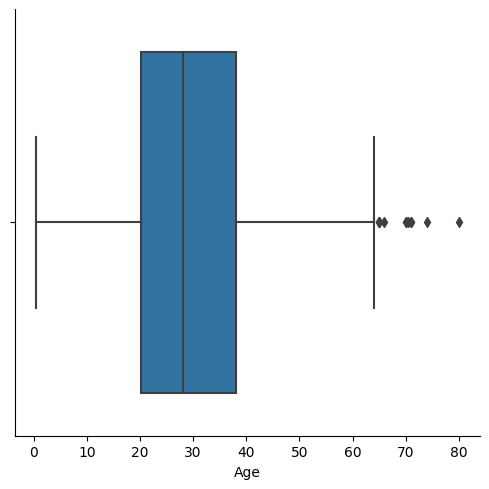

In [9]:
# Age column is numerical -> replace with mean or median, if lot of outliers replace with median else replace with mean.
# Box plot to check outliers
sns.catplot(data=titanic,x='Age',kind='box')

In [10]:
mean_age=titanic['Age'].mean()
titanic['Age'].fillna(mean_age,inplace=True)

In [11]:
titanic['Age'].isna().sum()

0

In [12]:
# Embarked column is categorical so replace it with mode(most repeated!)
mode_emb=titanic['Embarked'].dropna().mode()[0] # to not include nan values, we dropna temporarly. mode gives Seies object, so mode[0]
titanic['Embarked'].fillna(mode_emb,inplace=True)

In [13]:
titanic['Embarked'].isna().sum()

0

Cabin column has 687 missing values out of 891, So drop Cabin column

# If column has lot of missing values wrt total values, simply drop that column

In [14]:
 # dropping cabin column
titanic.drop('Cabin',axis=1,inplace=True) # axis=1 means column
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


# Summary of Strategies to deal with missing values
- In numerical column missing values can be replaced by mean or median of that column.
- In categorical column missing values can be replaced by mode.
- If number of missing values are very large wrt total values then that column can be dropped.
- If no of rows having missing values are very small wrt total rows then these rows can be dropped.
- Code: titanic.dropna(inplace=True)

# If any weird characters are present:
- Use info() to know the data type of columns then look for object dtype
- Then after using info() .Apply unique() on each object column

In [15]:
# Combine SibSp and Parch as one column then drop SibSp and Parch columns
titanic['family_members']=titanic['SibSp']+titanic['Parch']
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1


In [16]:
# dropping SibSp and Parch columns
titanic.drop(['SibSp','Parch'],inplace=True,axis=1)

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


# Q. How many people survived and how many people dead?

<Axes: xlabel='Survived', ylabel='count'>

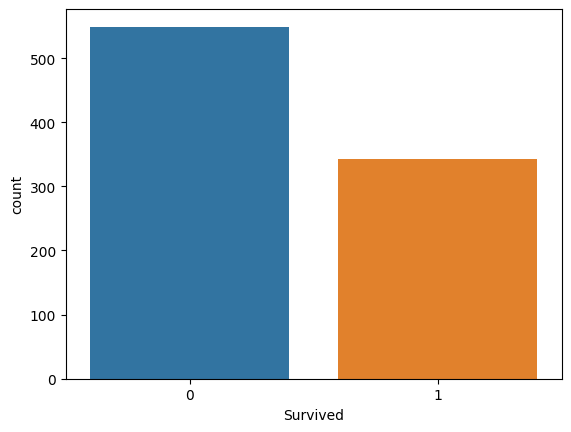

In [18]:
sns.countplot(data=titanic,x='Survived')

In [19]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
print("Percentage of people dead =",round((titanic['Survived'].value_counts()[0]/891)*100,2))
print("Percentage of people survived =",round((titanic['Survived'].value_counts()[1]/891)*100,2))

Percentage of people dead = 61.62
Percentage of people survived = 38.38


 #  Q. How gender affects the survival?

<Axes: xlabel='Survived', ylabel='count'>

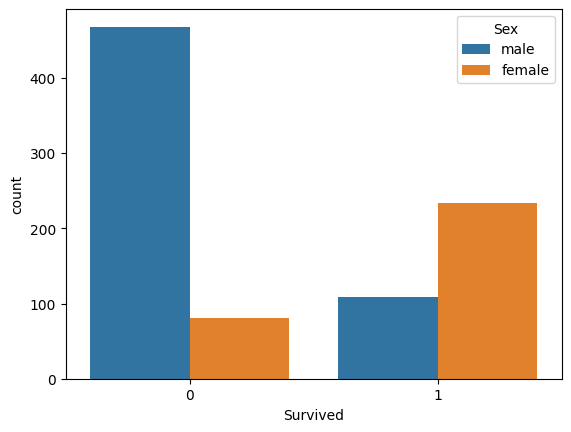

In [21]:
sns.countplot(data=titanic,x='Survived',hue='Sex')

In [22]:
result=titanic.groupby('Sex')['Survived'].value_counts(normalize=True)
result

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [23]:
print("Percentage of male survived =",round(result['male'][1]*100,2))
print("Percentage of male dead =",round(result['male'][0]*100,2))
print("Percentage of female survived =",round(result['female'][1]*100,2))
print("Percentage of female dead =",round(result['female'][0]*100,2))

Percentage of male survived = 18.89
Percentage of male dead = 81.11
Percentage of female survived = 74.2
Percentage of female dead = 25.8


# Q. Effect of passenger class on survival?


<Axes: xlabel='Sex', ylabel='count'>

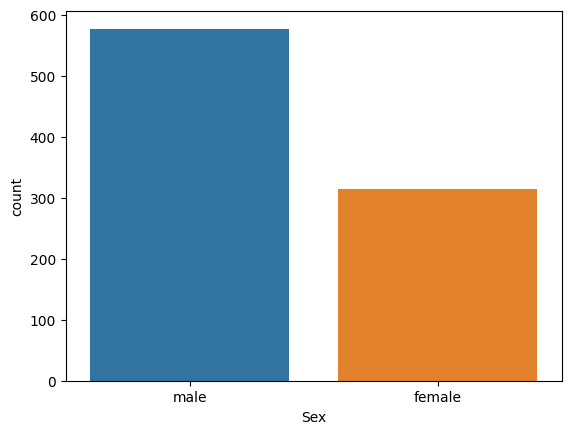

In [24]:
# No of males and females
sns.countplot(x='Sex',data=titanic)

### How many people are in class-1,2,3?

In [25]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

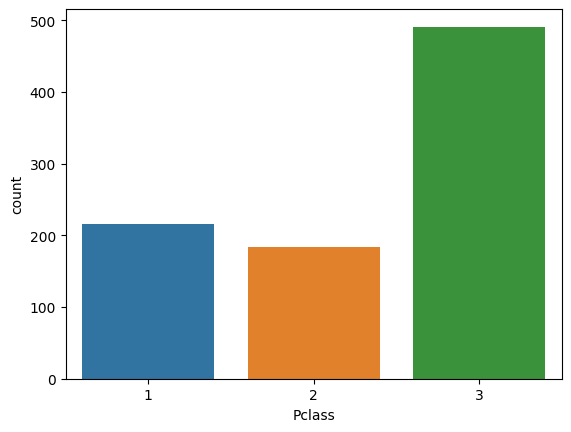

In [26]:
sns.countplot(x='Pclass',data=titanic)

<Axes: xlabel='Pclass', ylabel='count'>

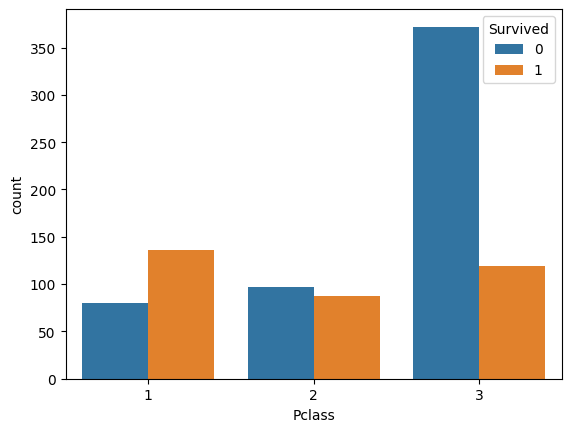

In [27]:
sns.countplot(data=titanic,x='Pclass',hue='Survived')

In [28]:
pclass_svl=titanic.groupby('Pclass')['Survived'].value_counts(normalize=True)
pclass_svl

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

In [29]:
print("% of people dead in class-1 =",round(pclass_svl[1][0]*100,2))
print("% of people survived in class-1 =",round(pclass_svl[1][1]*100,2))
print("% of people dead in class-2 =",round(pclass_svl[2][0]*100,2))
print("% of people survived in class-2 =",round(pclass_svl[2][1]*100,2))
print("% of people dead in class-3 =",round(pclass_svl[3][0]*100,2))
print("% of people survived in class-3 =",round(pclass_svl[3][1]*100,2))

% of people dead in class-1 = 37.04
% of people survived in class-1 = 62.96
% of people dead in class-2 = 52.72
% of people survived in class-2 = 47.28
% of people dead in class-3 = 75.76
% of people survived in class-3 = 24.24


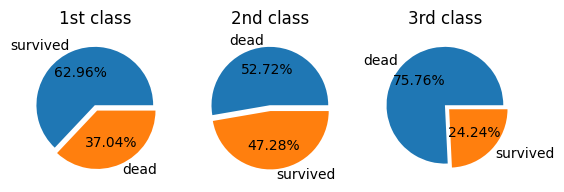

In [30]:
# Pie chart
plt.subplot(1,3,1)
plt.title('1st class')
plt.pie(titanic.groupby('Pclass')['Survived'].value_counts()[1],labels=['survived','dead'],autopct='%1.2f%%',explode=[0,0.1])

plt.subplot(1,3,2)
plt.title('2nd class')
plt.pie(titanic.groupby('Pclass')['Survived'].value_counts()[2],labels=['dead','survived'],autopct='%1.2f%%',explode=[0,0.1])

plt.subplot(1,3,3)
plt.title('3rd class')
plt.pie(titanic.groupby('Pclass')['Survived'].value_counts()[3],labels=['dead','survived'],autopct='%1.2f%%',explode=[0,0.1])
plt.show()

# Q. Effect of embarked column on survival?

In [31]:
# No of people in S,C & Q
titanic['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

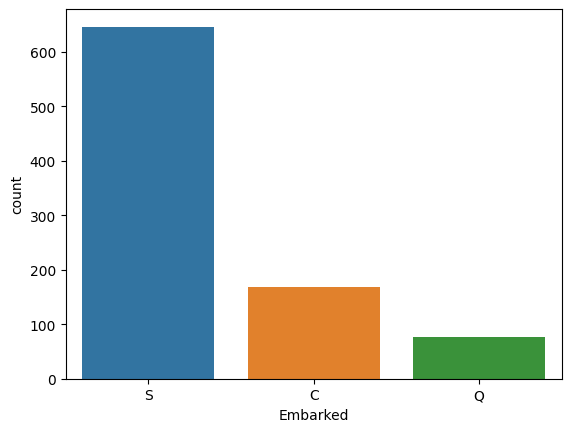

In [32]:
# Count plot for no of eople in S,C & Q
sns.countplot(x='Embarked',data=titanic)

<Axes: xlabel='Embarked', ylabel='count'>

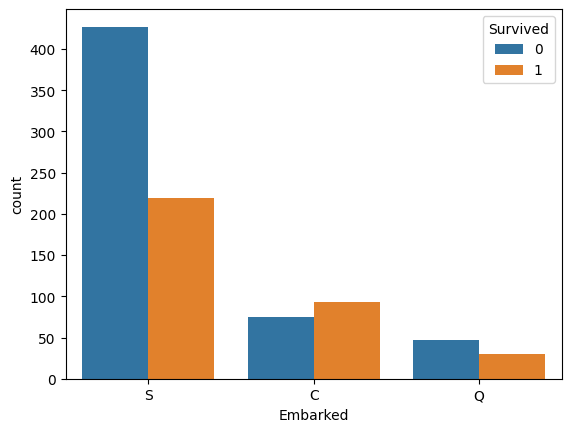

In [33]:
sns.countplot(data=titanic,x='Embarked',hue='Survived')

In [34]:
emb_svl=titanic.groupby('Embarked')['Survived'].value_counts(normalize=True)
emb_svl

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

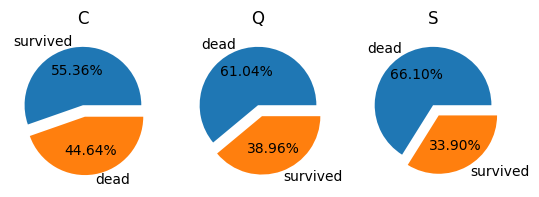

In [35]:
plt.subplot(1,3,1)
plt.title("C")
plt.pie(titanic.groupby('Embarked')['Survived'].value_counts()['C'],labels=['survived','dead'],autopct='%1.2f%%',explode=[0,0.2])

plt.subplot(1,3,2)
plt.title("Q")
plt.pie(titanic.groupby('Embarked')['Survived'].value_counts()['Q'],labels=['dead','survived'],autopct='%1.2f%%',explode=[0,0.2])

plt.subplot(1,3,3)
plt.title("S")
plt.pie(titanic.groupby('Embarked')['Survived'].value_counts()['S'],labels=['dead','survived'],autopct='%1.2f%%',explode=[0,0.2])
plt.show()

# No of Family memebers has any thing to do with survival?

<Axes: xlabel='family_members', ylabel='count'>

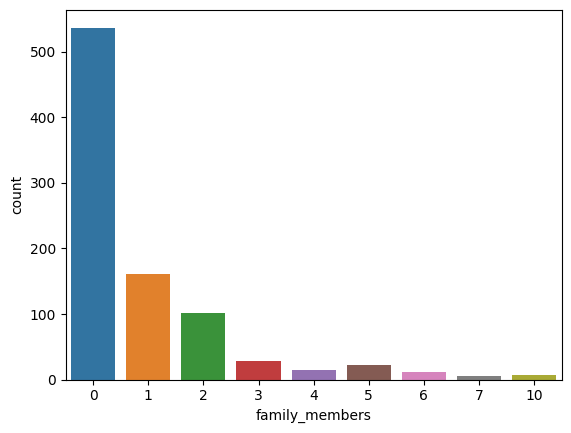

In [36]:
# count plot for family_members
sns.countplot(data=titanic,x='family_members')

In [37]:
titanic['family_members'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_members, dtype: int64

<Axes: xlabel='family_members', ylabel='count'>

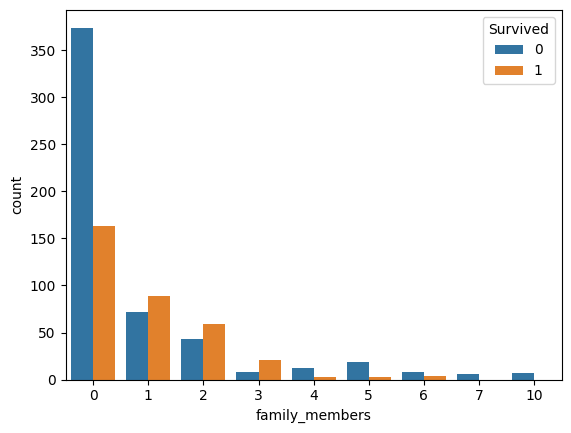

In [38]:
sns.countplot(data=titanic,x='family_members',hue='Survived')

# There is a effect of no. of family_members on survival rate
- Alone survival chances are low, with min family memebers survial chances are high, with more family members survival chances are less

<ipython-input-39-23e45eb2415b>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Fare'],hist=False)


<Axes: xlabel='Fare', ylabel='Density'>

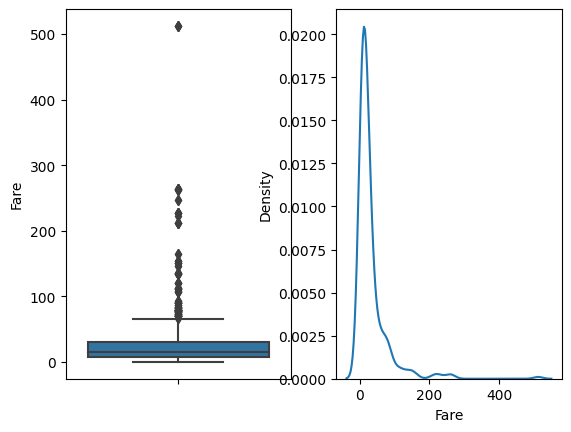

In [39]:
# Analysing Fare column

# Box plot
plt.subplot(1,2,1)
sns.boxplot(data=titanic,y='Fare')

# dist plot
plt.subplot(1,2,2)
sns.distplot(titanic['Fare'],hist=False)

In [40]:
titanic[titanic['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
258,259,1,1,"Ward, Miss. Anna",female,35.0,PC 17755,512.3292,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,PC 17755,512.3292,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,PC 17755,512.3292,C,0


#### Only 3 passengers are paying very high amount which makes the graph right squed

<Axes: xlabel='Survived', ylabel='Fare'>

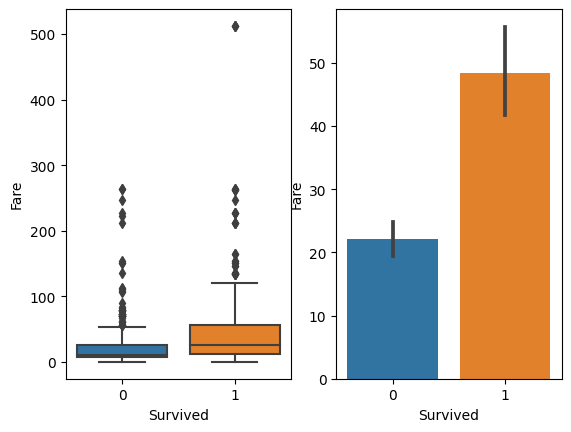

In [41]:
# Fare wrt survival
# Box plot
plt.subplot(1,2,1)
sns.boxplot(data=titanic,y='Fare',x='Survived')

# bar plot
plt.subplot(1,2,2)
sns.barplot(data=titanic,x='Survived',y='Fare')

# From bar plot we can observe that 'mean fare of survived is much higher than mean fare of dead'. Which means those who pay high fare they were more likely to survive.

# How Fare effecting Pclass?

<Axes: xlabel='Pclass', ylabel='Fare'>

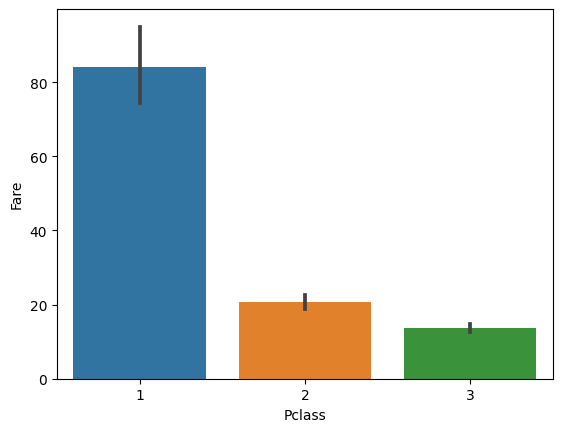

In [42]:
# barplot -> will compare average fare with Pclass
sns.barplot(data=titanic,x='Pclass',y='Fare')

# Conclusion: Mean Fare of Pclass 1 is higher than Pclass 2 and Pclass 2 is higher than Pclass 3

### As we observed earlier the survival rate of female is more than male. There is possibility that females are more in Pclass 1?


In [43]:
titanic.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

In [44]:
titanic.groupby('Sex')['Pclass'].value_counts() # No of females travelling in Pclass 1,2,3 wrt to total females?

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

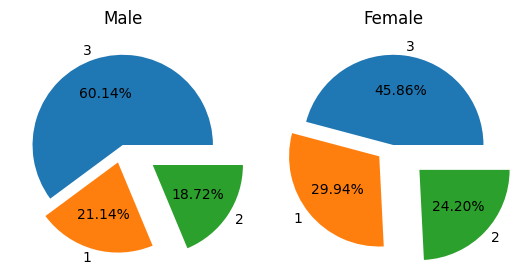

In [45]:
plt.subplot(1,2,1)
plt.title("Male")
plt.pie(titanic.groupby('Sex')['Pclass'].value_counts()['male'],autopct='%1.2f%%',explode=[0,0.2,0.4],labels=['3','1','2'])

plt.subplot(1,2,2)
plt.title("Female")
plt.pie(titanic.groupby('Sex')['Pclass'].value_counts()['female'],autopct='%1.2f%%',explode=[0,0.2,0.4],labels=['3','1','2'])
plt.show()

#### let's check the relation between Fare and Sex?

<Axes: xlabel='Sex', ylabel='Fare'>

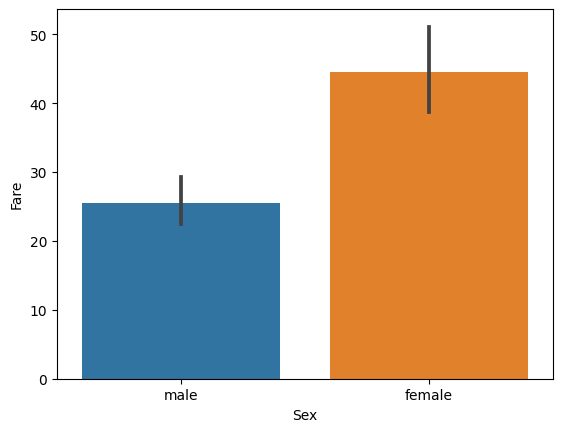

In [46]:
sns.barplot(data=titanic,x='Sex',y='Fare')

# Conclusion: Mean Fare of females is higher than mean fare of males. So at the time of escaping may be Females have given higher priority.

## Analysing Age column:

<ipython-input-47-d221f886b103>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'],hist=False)


<Axes: xlabel='Age', ylabel='Density'>

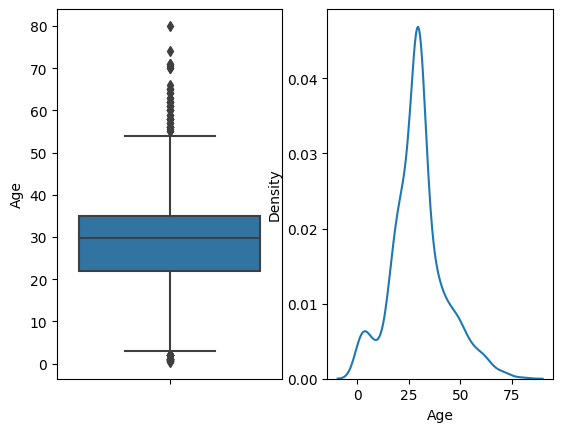

In [47]:
# Box plot
plt.subplot(1,2,1)
sns.boxplot(data=titanic,y='Age')

# dist plot
plt.subplot(1,2,2)
sns.distplot(titanic['Age'],hist=False)

Age is almost symmetrical

# Bivariate Analysis

Age vs Survival

<Axes: xlabel='Survived', ylabel='Age'>

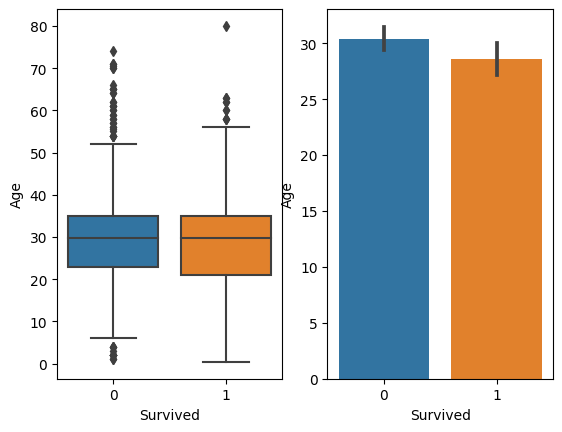

In [48]:
# Box plot
plt.subplot(1,2,1)
sns.boxplot(data=titanic,y='Age',x='Survived')

# bar plot
plt.subplot(1,2,2)
sns.barplot(data=titanic,x='Survived',y='Age')

# Conclusion: Mean age of dead people is 30, Mean age of survived people is nearly 28.


In [49]:
titanic.groupby('Survived')['Age'].mean()

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

# THE END :)